# AI-generated exploratory notebook for DANDI dataset 000673

**Note:** This notebook was automatically generated using `dandi-notebook-gen` AI and has **not** been manually verified. Interpret the code and results with caution. Please check all steps carefully before using this for your scientific analysis.

---

## About this dataset

**Title:** *Control of working memory by phase–amplitude coupling of human hippocampal neurons*

**Citation:** Daume, Jonathan; Kaminski, Jan; Schjetnan, Andrea G. P.; et al. (2025). _Data for: Control of working memory by phase–amplitude coupling of human hippocampal neurons_. DANDI Archive. https://dandiarchive.org/dandiset/000673/draft

**Description:**

Retaining information in working memory depends on cognitive control protecting memoranda-specific activity. Here, neural recordings from human medial temporal lobe (MTL) and prefrontal cortex during working memory tasks reveal that theta-gamma phase-amplitude coupling coordinates interactions underlying this control.

For full details, consult the publication and [sample code](https://github.com/rutishauserlab/SBCAT-release-NWB).

---

**Keywords:** cognitive neuroscience, working memory, neurophysiology, single-neurons, phase-amplitude coupling, human, intracranial

**License:** CC-BY-4.0

## Setup

This notebook assumes the following Python packages are installed:
- `dandi`
- `pynwb`
- `remfile`
- `h5py`
- `numpy`
- `matplotlib`
- `seaborn`

If missing, install them following the instructions at their respective websites.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import h5py
import remfile
import pynwb
from dandi.dandiapi import DandiAPIClient

sns.set_theme()

## List all assets in Dandiset 000673

Here we demonstrate how to list all files (assets) in the dandiset using the DANDI API:

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("000673", "draft")
assets = list(dandiset.get_assets())
print(f"Number of assets in Dandiset: {len(assets)}")
for asset in assets[:5]:
    print(f"- {asset.path} (size: {asset.size} bytes)")

Number of assets in Dandiset: 44
- sub-11/sub-11_ses-1_ecephys+image.nwb (size: 679215592 bytes)
- sub-12/sub-12_ses-1_ecephys+image.nwb (size: 518882687 bytes)
- sub-1/sub-1_ses-1_ecephys+image.nwb (size: 745833239 bytes)
- sub-1/sub-1_ses-2_ecephys+image.nwb (size: 690528032 bytes)
- sub-10/sub-10_ses-1_ecephys+image.nwb (size: 519312053 bytes)


For illustration, we will load and analyze the NWB file below. The code can be adapted to other files as needed.

**Example file:**

`sub-1/sub-1_ses-1_ecephys+image.nwb`

In [3]:
nwb_url = "https://api.dandiarchive.org/api/assets/65a7e913-45c7-48db-bf19-b9f5e910110a/download/"

file_obj = remfile.File(nwb_url)
h5file = h5py.File(file_obj)
io = pynwb.NWBHDF5IO(file=h5file, load_namespaces=True)
nwbfile = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/pynwb/ecephys.py:109: UserWarning: ElectricalSeries 'LFPs': The second dimension of data does not match the length of electrodes. Your data may be transposed.
  warnings.warn("%s '%s': The second dimension of data does not match the length of electrodes. "


## Basic NWB metadata

In [4]:
print("Session:", nwbfile.session_description)
print("Start time:", nwbfile.session_start_time)
print("Subject ID:", nwbfile.subject.subject_id)
print("Subject Sex:", nwbfile.subject.sex)
print("Subject Age:", nwbfile.subject.age)
print("Institution:", nwbfile.institution)
print("Lab:", nwbfile.lab)
print("Keywords:", nwbfile.keywords[:])

Session: SBCAT_ID: 1
Start time: 2018-01-01 00:00:00-08:00
Subject ID: 1
Subject Sex: F
Subject Age: P43Y
Institution: Cedars-Sinai Medical Center
Lab: Rutishauser
Keywords: ['single neuron, human, intracranial']


## Electrode table overview

In [5]:
etable = nwbfile.electrodes
print("Columns:", etable.colnames)
locations = etable['location'][:]
print("Unique electrode locations:", np.unique(locations))
print("Number of electrodes:", len(etable))

Columns: ('x', 'y', 'z', 'location', 'filtering', 'group', 'group_name', 'origChannel')
Unique electrode locations: ['amygdala_left' 'amygdala_right' 'dorsal_anterior_cingulate_cortex_left'
 'dorsal_anterior_cingulate_cortex_right' 'hippocampus_left'
 'hippocampus_right' 'pre_supplementary_motor_area_left'
 'pre_supplementary_motor_area_right'
 'ventral_medial_prefrontal_cortex_left'
 'ventral_medial_prefrontal_cortex_right']
Number of electrodes: 74


## Stimulus Templates - number of images

In [6]:
stim_imgs = nwbfile.stimulus_template['StimulusTemplates'].images
print(f"Number of stimulus images: {len(stim_imgs)}")
first_key = list(stim_imgs.keys())[0]
first_img = stim_imgs[first_key].data
print("Example image shape:", first_img.shape)

Number of stimulus images: 281
Example image shape: (400, 300, 3)


## Visualize some stimulus images

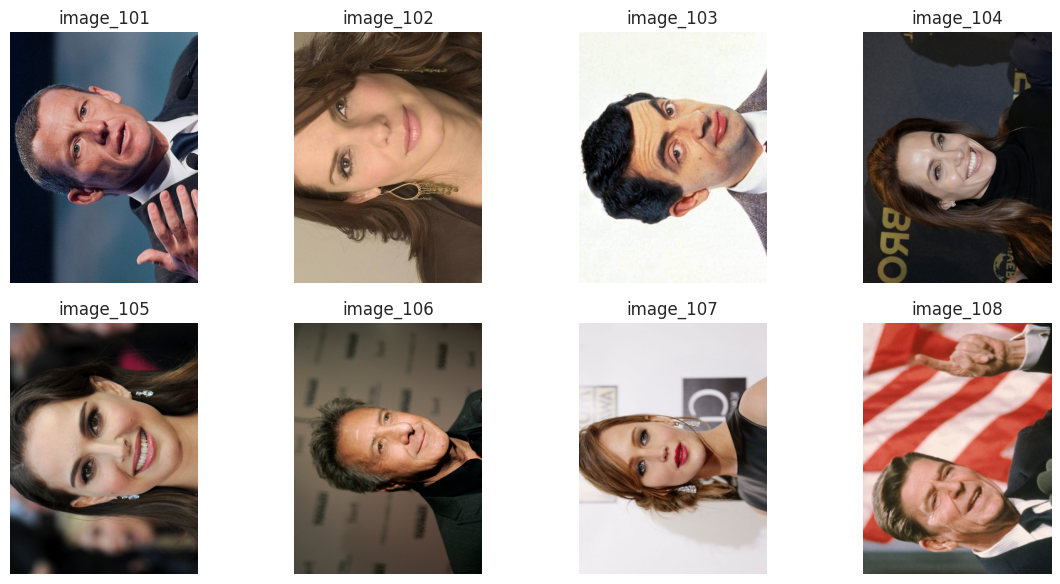

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
keys = list(stim_imgs.keys())
for ax, k in zip(axs.ravel(), keys[:8]):
    ax.imshow(stim_imgs[k].data)
    ax.set_title(k)
    ax.axis('off')
plt.tight_layout()
plt.show()

## Events TTL pulse counts and timing

Event TTL codes present: [ 1  2  3  5  6  7  8 11 60 61]


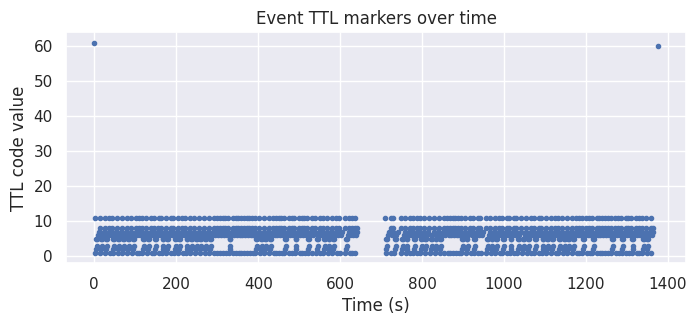

In [8]:
events = nwbfile.acquisition['events']
ttl_values = events.data[:]
ttl_times = events.timestamps[:]
print("Event TTL codes present:", np.unique(ttl_values))

plt.figure(figsize=(8,3))
plt.plot(ttl_times, ttl_values, marker='.', linestyle='none')
plt.xlabel("Time (s)")
plt.ylabel("TTL code value")
plt.title("Event TTL markers over time")
plt.show()

## Overview of LFP data

LFP data shape: (550276, 70)
LFP sampling rate: 400.0
LFP starting time: 1.55e-05


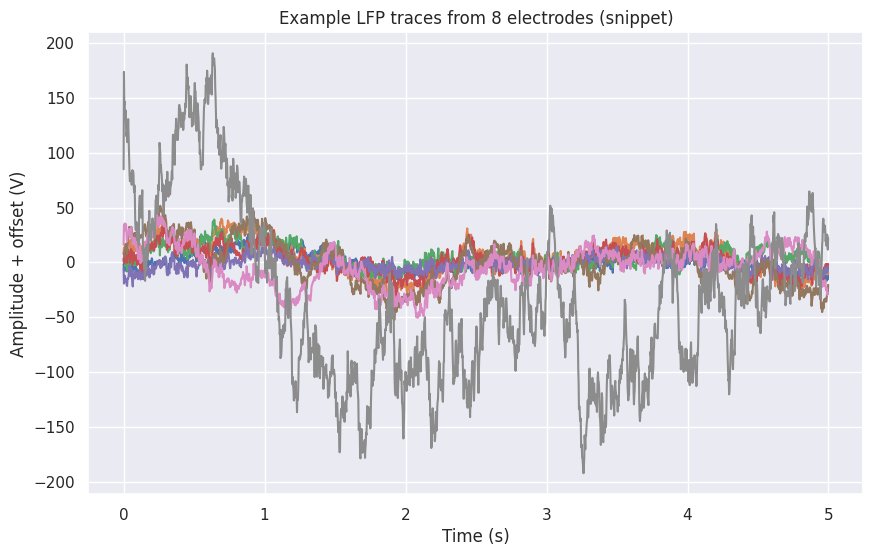

In [9]:
lfp = nwbfile.acquisition['LFPs']
print("LFP data shape:", lfp.data.shape)
print("LFP sampling rate:", lfp.rate)
print("LFP starting time:", lfp.starting_time)

# To avoid loading the entire dataset, load a snippet:
snippet = lfp.data[0:2000, :8]  # first 5s of data (2000 samples at 400Hz), first 8 electrodes

t = np.arange(snippet.shape[0]) / lfp.rate + lfp.starting_time

plt.figure(figsize=(10,6))
for i in range(snippet.shape[1]):
    plt.plot(t, snippet[:, i] + i*0.0005)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude + offset (V)")
plt.title("Example LFP traces from 8 electrodes (snippet)")
plt.show()

## Units table overview and spike counts

Units columns: ('spike_times', 'electrodes', 'clusterID_orig', 'waveforms', 'waveforms_mean_snr', 'waveforms_peak_snr', 'waveforms_isolation_distance', 'waveforms_mean_proj_dist')
Number of units: 46


Spike counts of first 10 units: [1652, 382, 1149, 1914, 611, 1446, 1070, 1235, 188, 1969]


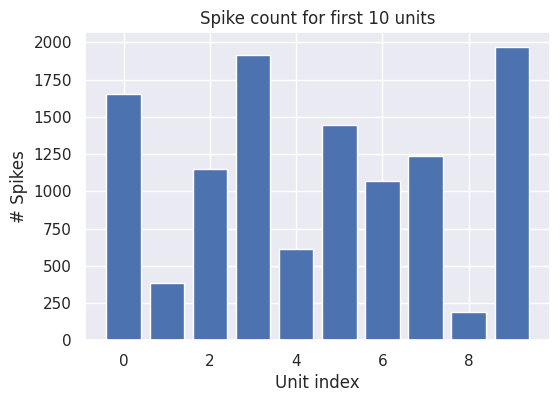

In [10]:
units = nwbfile.units
print("Units columns:", units.colnames)
unit_ids = units.id[:]
print("Number of units:", len(unit_ids))

# Get spike counts for first 10 units
nspikes = [len(units['spike_times'][i]) for i in range(min(10, len(unit_ids)))]
print("Spike counts of first 10 units:", nspikes)

plt.figure(figsize=(6,4))
plt.bar(np.arange(len(nspikes)), nspikes)
plt.xlabel("Unit index")
plt.ylabel("# Spikes")
plt.title("Spike count for first 10 units")
plt.show()

## Trial information

In [11]:
if hasattr(nwbfile, 'trials') and nwbfile.trials is not None:
    trials = nwbfile.trials
    print("Number of trials:", len(trials.id[:]))
    print("Trial columns:", trials.colnames)
else:
    print("No trial data found in this file.")

Number of trials: 140
Trial columns: ('loads', 'PicIDs_Encoding1', 'PicIDs_Encoding2', 'PicIDs_Encoding3', 'PicIDs_Probe', 'start_time', 'stop_time', 'timestamps_FixationCross', 'timestamps_Encoding1', 'timestamps_Encoding1_end', 'timestamps_Encoding2', 'timestamps_Encoding2_end', 'timestamps_Encoding3', 'timestamps_Encoding3_end', 'timestamps_Maintenance', 'timestamps_Probe', 'timestamps_Response', 'response_accuracy', 'probe_in_out')


# Summary

This notebook provided:

- Dataset background and metadata overview
- Instructions to list and fetch DANDI assets
- Demonstration of how to load an NWB file using `remfile` + `h5py` + `pynwb`
- Example exploration of subject info, electrode metadata, stimulus images, event TTLs, LFP signals, and sorted unit spike counts

To adapt this workflow:
- Replace the example NWB file URL with other assets of interest
- Adjust data loading according to your RAM/network, for larger/smaller subsets
- Dig deeper into any element (e.g., units waveform features, behavioral intervals) using the [PyNWB Documentation](https://pynwb.readthedocs.io/)

---

This concludes the exploratory notebook.